In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#데이터 준비

In [5]:
#데이터 로드
#data의 type은 사이킷런의 특정 type이라서 DF로 변환해주는 과정이 필요
data = load_iris()
print("iris dataset format and keys\n",data.keys())

iris dataset format and keys
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
#DF에 저장할 data랑 col설정
iris_data = data['data']
iris_cols = data['feature_names']

#col 이름 재설정
iris_cols=['sep_len', 'sep_wt', 'pet_len', 'pet_wt']

#DF 생성1 - 독립변수
iris_df = pd.DataFrame(data=iris_data, columns=iris_cols)

#DF 생성2 - 종속변수
iris_df['target'] = data['target']
print(iris_df.head(5))

   sep_len  sep_wt  pet_len  pet_wt  target
0      5.1     3.5      1.4     0.2       0
1      4.9     3.0      1.4     0.2       0
2      4.7     3.2      1.3     0.2       0
3      4.6     3.1      1.5     0.2       0
4      5.0     3.6      1.4     0.2       0


In [8]:
#품종별 데이터 카운팅 체크
target_cnt_df = iris_df.groupby('target').count()
print(target_cnt_df)

        sep_len  sep_wt  pet_len  pet_wt
target                                  
0            50      50       50      50
1            50      50       50      50
2            50      50       50      50


#PCA 수행
1. 표준화(독립변수만) 객체 생성
-> .fit_transform(x_train) -> DF 생성

2. PCA 수행
객체 생성(축소할 차원)

-> fit(x_z_train) : eigenvector, eigenvalue 찾기

-> transform : fit에서 구한 eigenvalue, eigenvector 이용해서 차원 축소


In [9]:
#0. standardization
X_train = iris_df.iloc[:,:4]
iris_z_score = StandardScaler().fit_transform(X_train)

iris_z_df = pd.DataFrame(data=iris_z_score, columns=iris_cols)
print(iris_z_df.head(5))

    sep_len    sep_wt   pet_len    pet_wt
0 -0.900681  1.019004 -1.340227 -1.315444
1 -1.143017 -0.131979 -1.340227 -1.315444
2 -1.385353  0.328414 -1.397064 -1.315444
3 -1.506521  0.098217 -1.283389 -1.315444
4 -1.021849  1.249201 -1.340227 -1.315444


In [10]:
#1. PCA
#1-가. 객체 생성
#n_components : 축소할 차원수
pca = PCA(n_components=2)

#1-나. .fit : iris 데이터를 통해 공분산 제작->공분산에 대한 eigenvalue, eigenvector 구하기
pca.fit(iris_z_df)

#eignevector
print('PCA Shape:\n',pca.components_.shape)
print('PCA eigenvectors:\n',pca.components_)

PCA Shape:
 (2, 4)
PCA eigenvectors:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]


PCA shape (축소차원크기, feature 수)

In [11]:
#2. eigenvector에 데이터 Projection
x_pca = pca.transform(iris_z_df)
print('PCA Projection result(shape)\n', x_pca.shape)

PCA Projection result(shape)
 (150, 2)


#PCA 검증

In [14]:
print('variance :\n',pca.explained_variance_)
print('variance ratio :\n',np.sum(pca.explained_variance_ratio_))

variance :
 [2.93808505 0.9201649 ]
variance ratio :
 0.9581320720000166


#PCA 결과 DF로 확인

In [16]:
pca_col = ['pca_com1', 'pca_com2']
pca_df = pd.DataFrame(data=x_pca, columns=pca_col)
pca_df['target']=data['target']
print(pca_df.head(5))

   pca_com1  pca_com2  target
0 -2.264703  0.480027       0
1 -2.080961 -0.674134       0
2 -2.364229 -0.341908       0
3 -2.299384 -0.597395       0
4 -2.389842  0.646835       0


#PCA 결과 그래프 확인

<function matplotlib.pyplot.show(close=None, block=None)>

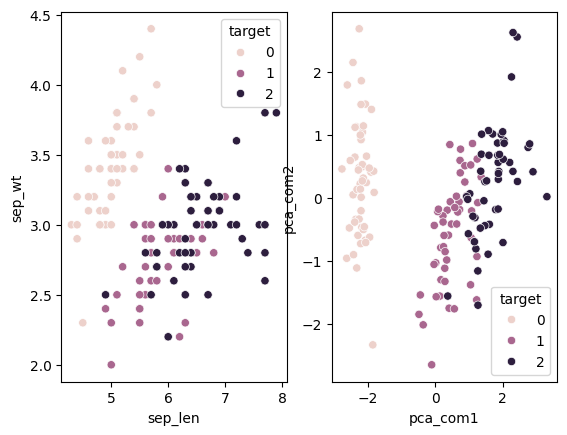

In [20]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(x=iris_df['sep_len'],y=iris_df['sep_wt'], hue = iris_df['target'], ax=ax[0])
sns.scatterplot(x=pca_df['pca_com1'], y= pca_df['pca_com2'], hue = pca_df['target'],ax=ax[1])
plt.show